<a href="https://colab.research.google.com/github/SarahFeanor/Portfolio-DataScience/blob/main/An%C3%A1lise_dos_Dados_do_Airbnb_em_Tokyo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<sub> 🔗[GitHub](https://github.com/SarahFeanor) | [LinkedIn](https://www.linkedin.com/in/sarahfrezende/) | [Medium](https://medium.com/@sarahfrezende)</sub>

📂 Projeto | Data Science | By Sarah Faria Rezende

---



  # **Análise dos Dados do Airbnb - Tokyo**🗼

  
  O **Airbnb** surgiu em **2008**, quando dois designers abriram suas portas a três viajantes. Desde então, essa ideia modesta explodiu em popularidade global, com milhões de anfitriões e viajantes aderindo.

  Através do **Airbnb**, é possível anunciar lugares únicos e reservar estadias incríveis em qualquer parte do mundo. Os anfitriões vão além de simples hospedagens, proporcionando experiências autênticas tanto para exploradores locais quanto para viajantes.

  Além disso, o **Airbnb** redefine a hospedagem tradicional, abrindo um leque de opções além dos hotéis convencionais. Seja alugando um quarto por curtos períodos ou reservando acomodações únicas em qualquer canto do planeta, a plataforma oferece diversas possibilidades.

  Em **2018**, após uma década de sua fundação, o **Airbnb** já havia recebido mais de **300 milhões** de viajantes do mundo todo, desafiando as normas hoteleiras e se estabelecendo como uma das principais forças no cenário global da hospedagem.

  Dentro de suas iniciativas, o **Airbnb** abraça a transparência e a democratização dos dados, disponibilizando informações sobre diversas das principais cidades mundiais. O portal [Inside Airbnb](http://insideairbnb.com/get-the-data/) abre as portas para um vasto conjunto de dados, pronto para ser explorado por mentes ávidas em busca de insights e soluções por meio da **Ciência de Dados**.

  ⛩️ Neste **notebook**, direcionaremos nossa análise para os dados concernentes à cidade de **Tokyo**, no Japão. Através dessa exploração, visamos extrair percepções e conhecimentos a partir dos dados brutos, mergulhando nas informações para desvendar aspectos relevantes da dinâmica do mercado de hospedagem da cidade.



### **Tokyo**

É a capital do **Japão**, e uma das cidades mais populosas e densamente povoadas do mundo. Conhecida por sua modernidade, abriga arranha-céus, tecnologia avançada e uma rica herança cultural. Como um centro financeiro e comercial global, a economia de Tóquio abrange tecnologia, moda e entretenimento, enquanto sua eficiência e sistemas de transporte avançados coexistem harmoniosamente com tradições antigas.

Tokyo é um polo cultural e artístico, com inúmeros museus, teatros e galerias, além de oferecer uma gastronomia diversificada, desde pratos tradicionais japoneses até culinária internacional. A cidade também se destaca em tecnologia, abrigando empresas líderes na indústria.

Com alto desenvolvimento humano, infraestrutura avançada e uma identidade cosmopolita, Tokyo atrai pessoas de todo o mundo em busca de oportunidades e experiências urbanas únicas.

### **Objetivo**

O **projeto** visa conduzir uma análise exploratória dos dados disponibilizados pelo [Inside Airbnb](http://insideairbnb.com/get-the-data/). Através dessa análise, **buscamos** identificar informações significativas e potenciais padrões, a fim de obter conclusões esclarecedoras sobre a utilização do aplicativo hoteleiro. As descobertas alcançadas têm o potencial de oferecer **insights valiosos** para aqueles que têm interesse em visitar o destino em questão.


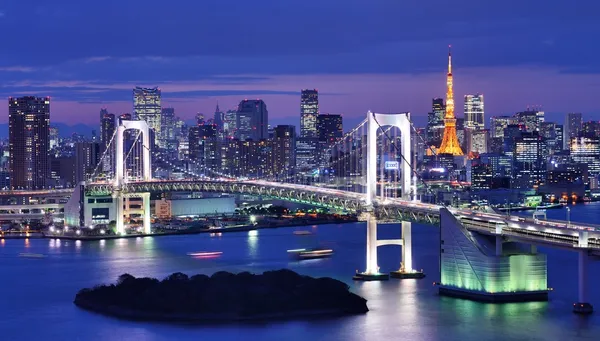

---
Baía de Tóquio na ponte do arco-íris . — Foto de sepavone


## **Cojunto de Dados**
Os dados foram adquiridas de um arquivo CSV disponibilizado no [Inside Airbnb](http://insideairbnb.com/get-the-data/). Para esta análise, o documento que será baixado é: listings.csv -	Summary information and metrics for listings in Tokyo (good for visualisations).

In [ ]:
# importando os pacotes necessários
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno
import numpy as np
import folium

%matplotlib inline
# tamanho do gráficos
plt.rcParams["figure.figsize"] = [10,5]
# tamanho dos dados
plt.rcParams["font.size"] = 12

In [ ]:
# importar o arquivo listings.csv para um DataFrame
df = pd.read_csv("/content/listings.csv")

## **Análise dos Dados**

O **objetivo** desta fase é estabelecer uma compreensão inicial da situação e obter uma visão da estrutura dos dados.

**Dicionário das variáveis**

* `id` - número de id gerado para identificar o imóvel
* `name` - nome da propriedade anunciada
* `host_id` - número de id do proprietário (anfitrião) da propriedade
* `host_name` - Nome do anfitrião
* `neighbourhood_group` - esta coluna não contém nenhum valor válido
* `neighbourhood` - nesse caso em específico, se refere ao nome dos distritos
* `latitude` - coordenada da latitude da propriedade
* `longitude` - coordenada da longitude da propriedade
* `room_type` - informa o tipo de quarto que é oferecido
* `price` - preço para alugar o imóvel
* `minimum_nights` - quantidade mínima de noites para reservar
* `number_of_reviews` - número de reviews que a propriedade possui
* `last_review` - data do último review
* `reviews_per_month` - quantidade de reviews por mês
* `calculated_host_listings_count` - quantidade de imóveis do mesmo anfitrião
* `availability_365` - número de dias de disponibilidade dentro de 365 dias

## **Questão 1** - quantos atributos (variáveis) e entradas compõem nosso conjunto de dados? Quais são os tipos das variáveis presentes?

Continuaremos **analisando** o número de registros presentes em nosso conjunto de dados, bem como examinaremos as categorias presentes em cada coluna.

O conjunto de dados que foi baixado representa a versão "resumida" do **Airbnb**.

In [ ]:
print("Entradas: ", df[df.columns[0]].count())
print("Variáveis: ", df.shape[1])

Entradas:  11177
Variáveis:  18


In [ ]:
# verificar as 5 primeiras entradas do dataset
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,197677,Rental unit in Sumida · ★4.78 · 1 bedroom · 2 ...,964081,Yoshimi & Marek,NaN,Sumida Ku,35.71707,139.82608,Entire home/apt,11000,3,173,2023-05-30,1.21,1,24,8,M130003350
1,776070,Home in Kita-ku · ★4.98 · 1 bedroom · 1 bed · ...,801494,Kei,NaN,Kita Ku,35.73844,139.76917,Private room,7208,3,243,2023-06-20,1.89,1,67,15,NaN
2,3427384,Rental unit in Edogawa · ★4.82 · 1 bedroom · 2...,13018876,Masakatsu,NaN,Edogawa Ku,35.68374,139.85971,Entire home/apt,7847,2,100,2023-05-22,0.93,2,231,19,Hotels and Inns Business Act | 東京都江戸川区保健所 | 18...
3,905944,Rental unit in Shibuya · ★4.76 · 2 bedrooms · ...,4847803,Best Stay In Tokyo!,NaN,Shibuya Ku,35.67878,139.67847,Entire home/apt,23066,3,186,2023-06-26,1.49,5,229,1,Hotels and Inns Business Act | 渋谷区保健所長 | 31渋健生...
4,3514008,Rental unit in Arakawa-ku · ★4.86 · 1 bedroom ...,17694529,Hisao,NaN,Arakawa Ku,35.72672,139.78201,Entire home/apt,2871,1,269,2023-06-08,2.59,9,11,29,Hotels and Inns Business Act | 東京都荒川区保健所 | 31荒...


Inicialmente, é perceptível a falta de valores em colunas como **neighbourhood_group** e em alguns da coluna **license**. Esses dados serão corrigidos posteriormente para garantir uma análise mais precisa e confiável.

In [ ]:
# verificar o tipo das variáveis
display(df.dtypes)

id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group               float64
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
number_of_reviews_ltm               int64
license                            object
dtype: object

## **Questão 2** - qual é a proporção de valores ausentes no conjunto de dados?

A qualidade de um *conjunto de dados* está diretamente ligada à presença de valores ausentes. É crucial compreender desde o início se esses valores nulos possuem relevância em relação ao total de registros.

* É possível ver que a coluna `neighbourhood_group` possui 100% dos seus valores faltantes.
* As variáveis `reviews_per_month` e `last_review `possuem como valores nulos 11% e coluna ` license` 8%.

In [ ]:
# ordenar em ordem decrescente as variáveis por seus valores ausentes
(round((df.isnull().sum()/df.shape[0]),2)*100).sort_values(ascending = False)

neighbourhood_group               100.0
reviews_per_month                  11.0
last_review                        11.0
license                             8.0
minimum_nights                      0.0
number_of_reviews_ltm               0.0
availability_365                    0.0
calculated_host_listings_count      0.0
number_of_reviews                   0.0
id                                  0.0
name                                0.0
room_type                           0.0
longitude                           0.0
latitude                            0.0
neighbourhood                       0.0
host_name                           0.0
host_id                             0.0
price                               0.0
dtype: float64

In [ ]:
# verificar quantidade de itens por culuna
df.count().sort_values(ascending = False)

id                                11177
room_type                         11177
number_of_reviews_ltm             11177
availability_365                  11177
calculated_host_listings_count    11177
number_of_reviews                 11177
minimum_nights                    11177
name                              11177
price                             11177
longitude                         11177
latitude                          11177
neighbourhood                     11177
host_name                         11177
host_id                           11177
license                           10237
last_review                        9925
reviews_per_month                  9925
neighbourhood_group                   0
dtype: int64

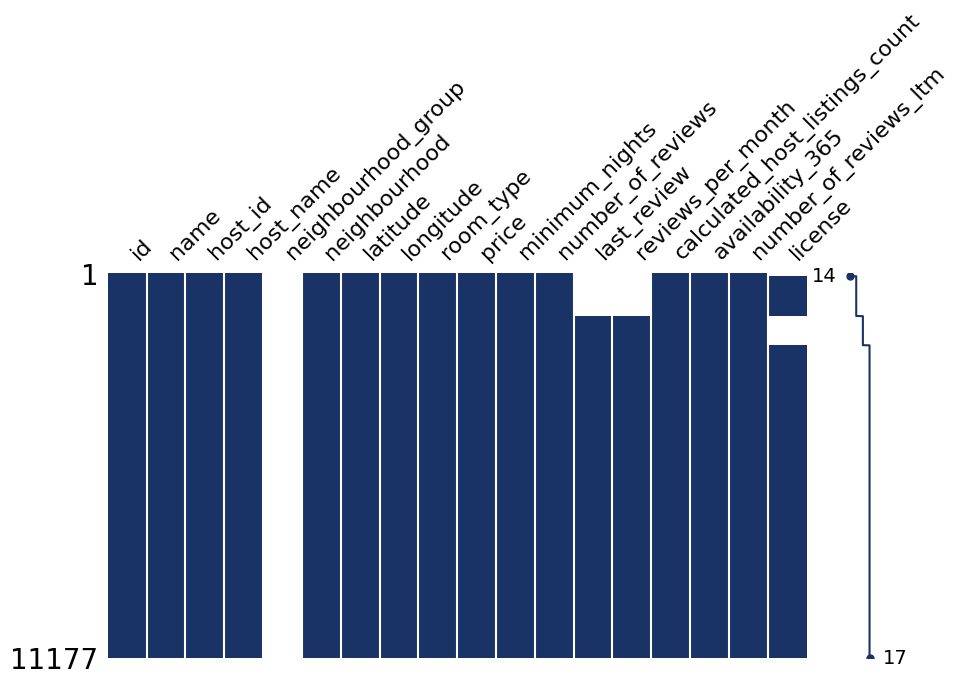

In [ ]:
# gráfico de valores ausentes
missingno.matrix(df, figsize = (10,5),  color=(0.1, 0.2, 0.4), sort="ascending");

## Limpeza de Dados Ausentes

Sem nenhuma perda de dados, podemos **excluir** a coluna `neighbourhood_group`, pois não apresentam informações.

In [ ]:
# criar uma cópia do dataframe original
df_hk = df.copy()

# excluir colunas com dados faltantes
df_hk.drop(columns=['neighbourhood_group'], inplace=True)

À respeito da coluna `reviews_per_month`, como se trata de uma variável quantitativa, irei **preencher** **os** **valores** **ausentes** com a mediana.

In [ ]:
# verificar a mediana de revies_per_month
med_reviews = df_hk.reviews_per_month.median()
print("A mediana de reviews_per_month é {}. " .format(med_reviews))

A mediana de reviews_per_month é 1.06. 


In [ ]:
# preencher as informações faltantes com a mediana
df_hk = df_hk.fillna({'reviews_per_month':med_reviews})

As colunas `last_review` e `license`, por sua vez, serão removidas, uma vez que a ausência delas não impacta a continuidade da análise.

In [ ]:
# excluir coluna com dados faltantes
df_hk.drop(columns=['last_review', 'license'], inplace=True)

Vamos analisar os resultados após a conclusão da limpeza.

In [ ]:
# verificar dados ausentes
(df_hk.isnull().sum()).sort_values(ascending=False)

id                                0
name                              0
host_id                           0
host_name                         0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
number_of_reviews_ltm             0
dtype: int64

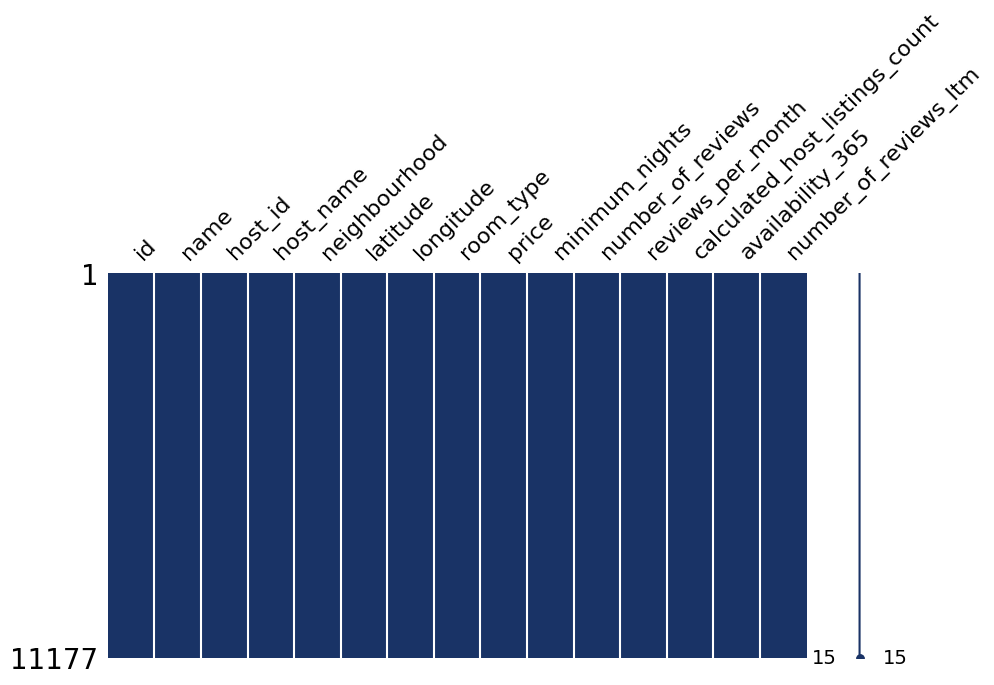

In [ ]:
# gráfico de valores ausentes
missingno.matrix(df_hk, figsize = (10,5), color=(0.1, 0.2, 0.4), sort="ascending");

## **Questão 3** -  Qual o tipo de distribuição das variáveis?

Para compreender a distribuição das variáveis, irei criar um **histograma** das características numéricas presentes no conjunto de dados, além de gerar um gráfico de **hexabinagem** que relaciona as coordenadas de `latitude` e `longitude` com os valores de `preço`.

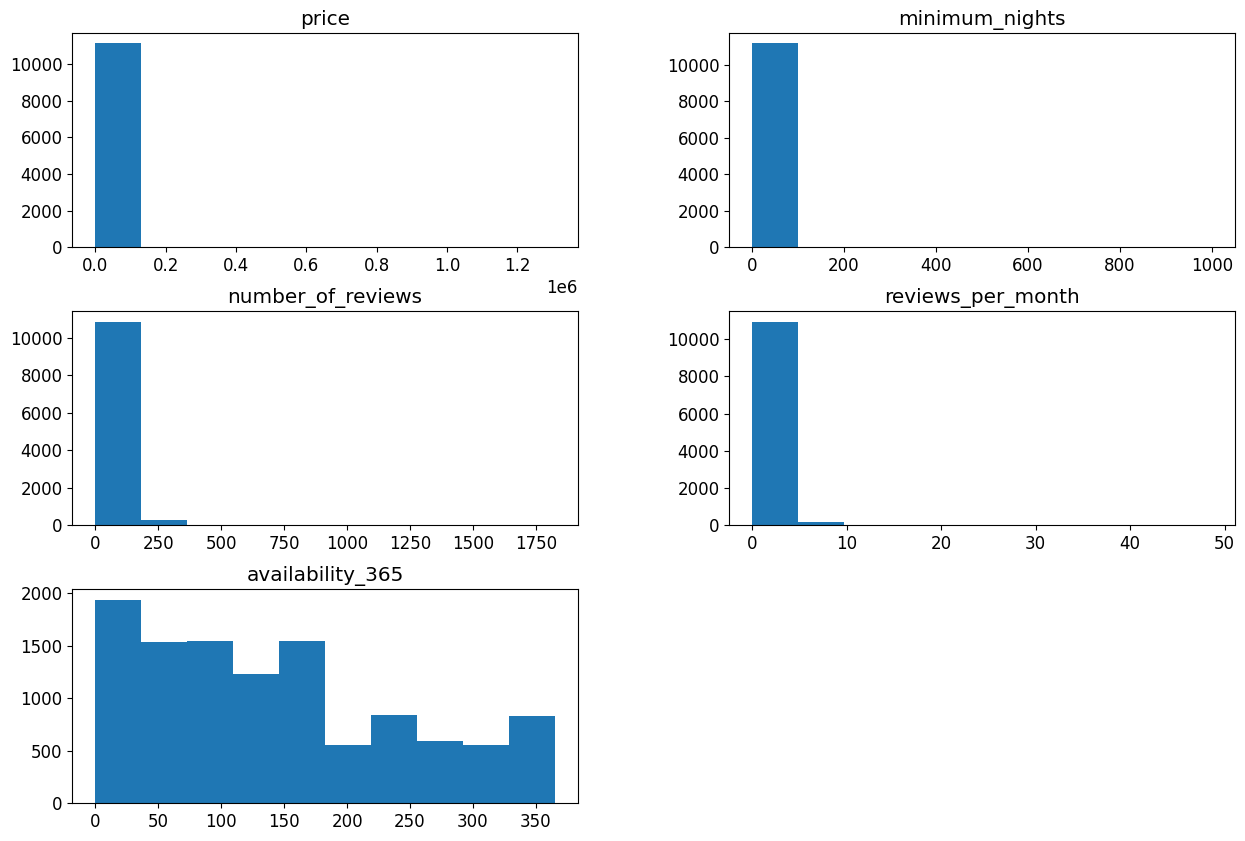

In [ ]:
# plotar o histograma das variáveis numéricas
df_hk[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'availability_365']].hist(figsize=(15,10), grid=False);

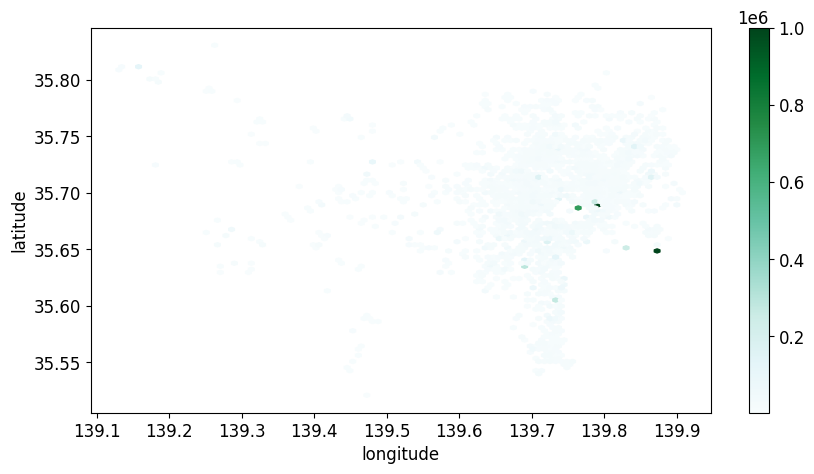

In [ ]:
# plotar gráfico hexabinário
df_hk.plot.hexbin(x = 'longitude', y='latitude', C='price', figsize=(10,5));

# Limpando outliers

Outlier é um dado que se difere significativamente das observações. Para tratar dos outliers desse conjunto de dados, iremos analisar a distribuição estatística, plotar boxplots e calcular os limites utilizando a regra do IQR Score.

Sendo o IQR a subtração do Terceiro Quartil (75%) pelo Primeiro Quartil (25%)

## IQR = Q3 - Q1
Vamos verificar o resumo estatístico das variáveis.

In [ ]:
# ver o resumo estatístico das variáveis numéricas
df_hk[['price', 'minimum_nights', 'number_of_reviews',
       'reviews_per_month', 'availability_365']].describe().round(1)

,price,minimum_nights,number_of_reviews,reviews_per_month,availability_365
count,11177.0,11177.0,11177.0,11177.0,11177.0
mean,21800.2,2.6,36.5,1.4,142.3
std,48449.8,12.2,58.1,1.6,105.1
min,0.0,1.0,0.0,0.0,0.0
25%,9029.0,1.0,4.0,0.6,57.0
50%,14429.0,1.0,16.0,1.1,128.0
75%,23929.0,2.0,46.0,1.8,220.0
max,1306500.0,1000.0,1825.0,48.6,365.0


### Agora, vamos realizar uma análise exploratória sobre os outliers (valores atípicos) em cada uma das colunas:

* `Price`: Lembrando que a variável price trata do preço da diária dos imóveis em moeda local iene (¥, JPY). Há um valor mínimo de **0.0**, o que parece ser uma entrada inválida ou um valor atípico. Isso deve ser investigado e possivelmente tratado. Além disso, o valor máximo é muito maior do que a média e a mediana, indicando a presença de valores atípicos de preços altos.

* `Minimum Nights`: O valor máximo de **1000.0** para o número mínimo de noites também parece ser um valor atípico. Normalmente, a maioria das acomodações teria um valor muito menor. Isso pode ser resultado de erro de entrada ou situações incomuns.

* As variáveis `number_of_reviews` e `reviews_per_monthe availability_365` também podem conter outliers, mas não vamos nos preocupar com elas agora.
Seguiremos os passos a seguir:

**Lidando com os outliers:** é importante entender o contexto subjacente dos dados. Algumas ações que você pode considerar incluem:

* `Price`: Examinar os valores muito altos e verificar se eles fazem sentido no contexto das acomodações listadas. Você pode considerar limitar a análise a um intervalo de preços mais realista ou remover entradas com preços muito altos ou inválidos.

* ` Minimum Nights`: Verificar os casos em que o número mínimo de noites é 1000.0. Isso pode ser um erro e exigir alguma investigação ou tratamento.

Em geral, é importante investigar e entender os outliers antes de tomar decisões ou fazer análises, pois eles podem distorcer as conclusões e as estatísticas descritivas.


### Seguiremos os passos a seguir:

* Definir o Q1 e Q3 para as variáveis que serão limpas.
* Calcular o IQR para as variáveis.
* Definir o limite superior e inferior para cortar os outliers.
* Remover os outliers.

# Variavél `price`

In [ ]:
# identificar o iqr da variável price
q1_price = df_hk.price.quantile(.25)
q3_price = df_hk.price.quantile(.75)
IQR_price = q3_price - q1_price
print('IQR da variável price: ', IQR_price)

# definir os limites superiores e inferiores
sup_price = q3_price + 1.5 * IQR_price
inf_price = q1_price - 1.5 * IQR_price

print('Limite superior de price: ', sup_price)
print('Limite inferior de price: ', inf_price)

IQR da variável price:  14900.0
Limite superior de price:  46279.0
Limite inferior de price:  -13321.0


Aqui podemos ver que, apesar de não termos outliers na parte inferior, continuamos tendo valores iguais a zero, que precisam ser tratados.

Vamos plotar um boxplot para visualizarmos a diferença feita pela limpeza.

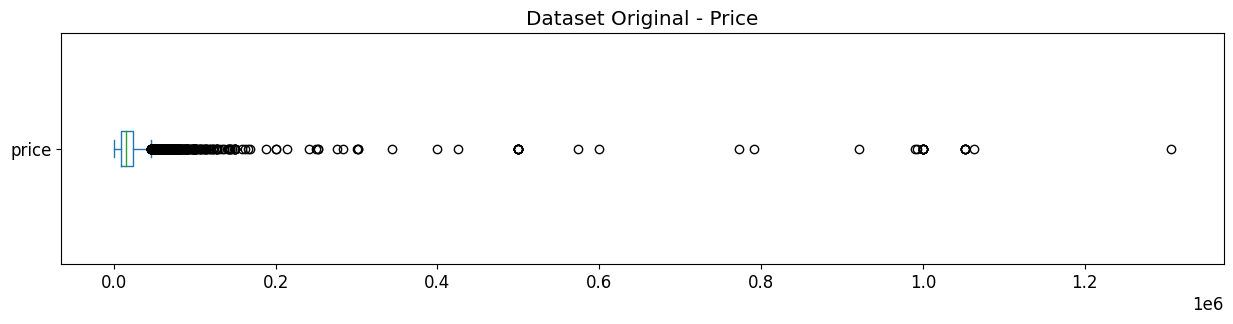

O dataset possui 11177 colunas
754 Entradas acima de 46279.0
Representam 6.75% do dataset


In [ ]:
# verificar o conjunto de dados original
fig, ax = plt.subplots(figsize=(15,3))
df_hk.price.plot(kind='box', vert=False);
ax.set_title('Dataset Original - Price')
plt.show()

print("O dataset possui {} colunas".format(df_hk.shape[0]))
print("{} Entradas acima de 46279.0".format(len(df_hk[df_hk.price > 46279.0])))
print("Representam {:.2f}% do dataset".format((len(df_hk[df_hk.price > 46279.0]) / df_hk.shape[0])*100))

In [ ]:
# copiar o dataset
df_clean = df_hk.copy()
# excluir valores acima do limite superior
df_clean.drop(df_clean[df_clean.price > 46279.0].index, axis=0, inplace=True)
# excluir valores iguais a 0
df_clean.drop(df_clean[df_clean.price == 0.0].index, axis=0, inplace=True)

print('Shape antes da limpeza: ', df_hk.shape)
print('Shape após a limpeza: ',df_clean.shape)

Shape antes da limpeza:  (11177, 15)
Shape após a limpeza:  (10422, 15)


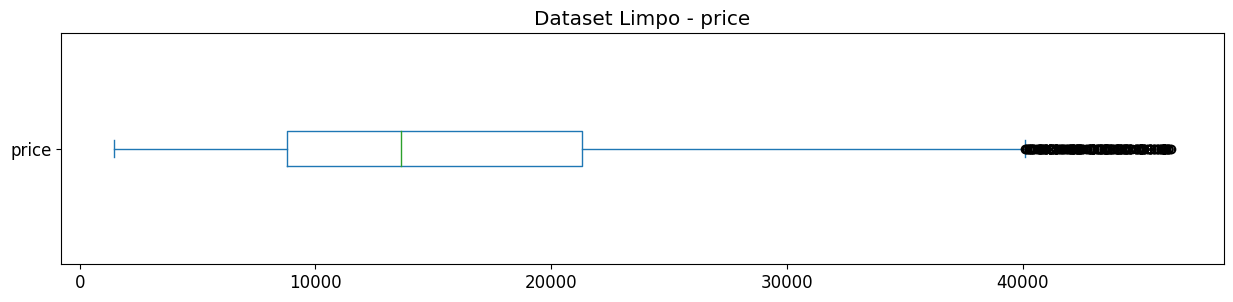

Tamanho original: 11177 colunas
Tamanho atual: 10422 colunas


In [ ]:
# verificar o conjunto limpo
fig, ax = plt.subplots(figsize=(15,3))
df_clean.price.plot(kind='box', vert=False);
ax.set_title('Dataset Limpo - price')
plt.show()

print("Tamanho original: {} colunas".format(df_hk.shape[0]))
print("Tamanho atual: {} colunas".format(df_clean.shape[0]))

Apesar do boxplot mostrar alguns dados como outliers, eles estão sendo calculados em relação ao dataset limpo, que considerou os quartis da base original

Iremos verificar como se apresenta o histograma e o gráfico hexa binário para a variável após tais modificações.

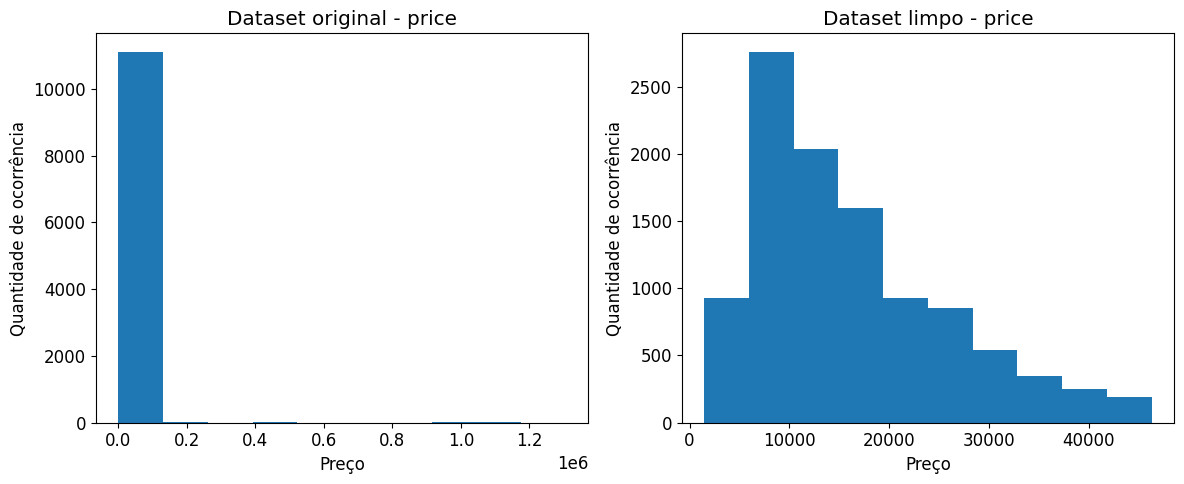

In [ ]:
# plotar o histograma da variável price
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (12, 5))

df_hk.price.plot(kind = 'hist', ax = ax1, bins = 10)
ax1.set_title("Dataset original - price")
ax1.set_xlabel("Preço")
ax1.set_ylabel("Quantidade de ocorrência")


df_clean.price.plot(kind = 'hist', ax = ax2)
ax2.set_title("Dataset limpo - price")
ax2.set_xlabel("Preço")
ax2.set_ylabel("Quantidade de ocorrência")

plt.tight_layout()

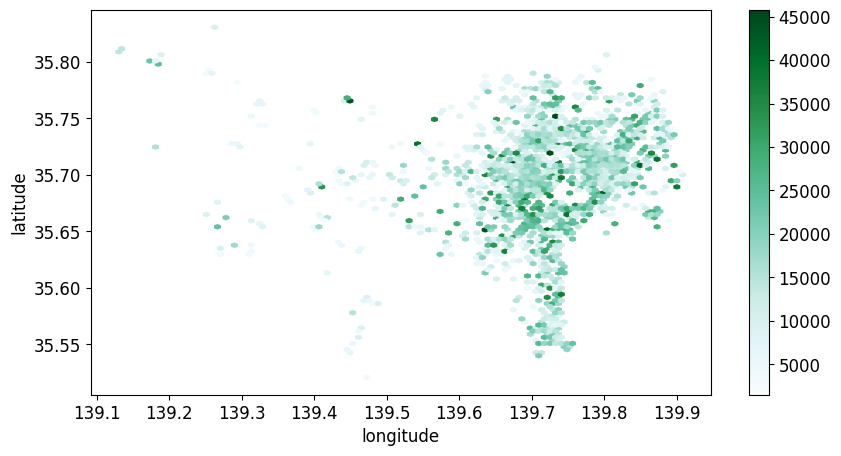

In [ ]:
# plotar gráfico hexabinário
df_clean.plot.hexbin(x = 'longitude', y='latitude', C='price', figsize=(10,5));

## Variável `minimum_nights`

In [ ]:
# identificar o IQR para a variável minimum_nights
q1_minimum_nights = df_hk.minimum_nights.quantile(.25)
q3_minimum_nights = df_hk.minimum_nights.quantile(.75)
IQR_minimum_nights = q3_minimum_nights - q1_minimum_nights
print('IQR da variável minimum_nights: ', IQR_minimum_nights)

# definindo os limites
sup_minimum_nights = q3_minimum_nights + 1.5 * IQR_minimum_nights
inf_minimum_nights = q1_minimum_nights - 1.5 * IQR_minimum_nights

print('Limite superior de minimum_nights: ', sup_minimum_nights)
print('Limite inferior de minimum_nights: ', inf_minimum_nights)

IQR da variável minimum_nights:  1.0
Limite superior de minimum_nights:  3.5
Limite inferior de minimum_nights:  -0.5


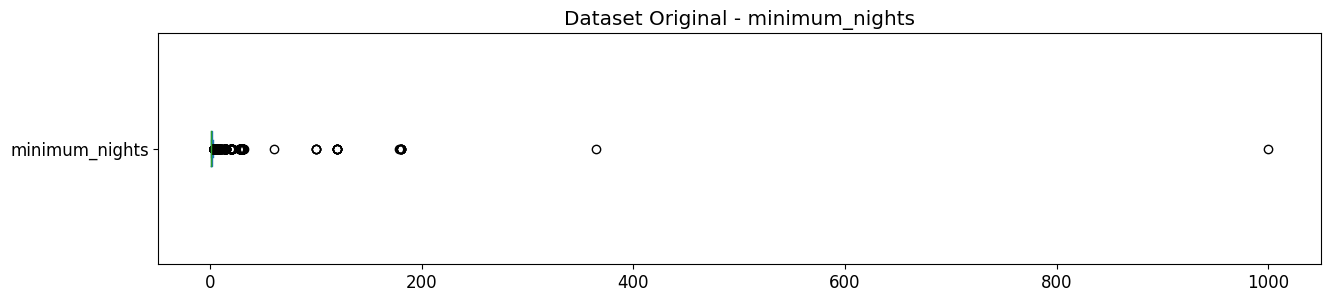

O dataset possui 11177 colunas
749 Entradas acima de 3.5
Representam 6.70% do dataset


In [ ]:
# verificar o conjunto original
fig, ax = plt.subplots(figsize=(15,3))
df_hk.minimum_nights.plot(kind='box', vert=False);
ax.set_title('Dataset Original - minimum_nights')
plt.show()

print("O dataset possui {} colunas".format(df_hk.shape[0]))
print("{} Entradas acima de 3.5".format(len(df_hk[df_hk.minimum_nights > 3.5])))
print("Representam {:.2f}% do dataset".format((len(df_hk[df_hk.minimum_nights > 3.5]) / df_hk.shape[0])*100))

In [ ]:
# limpar o dataset acima do limite superior
df_clean.drop(df_clean[df_clean.minimum_nights > 3.5].index, axis=0, inplace=True)

print('Shape antes da limpeza: ', df_hk.shape)
print('Shape após a limpeza: ',df_clean.shape)

Shape antes da limpeza:  (11177, 15)
Shape após a limpeza:  (9733, 15)


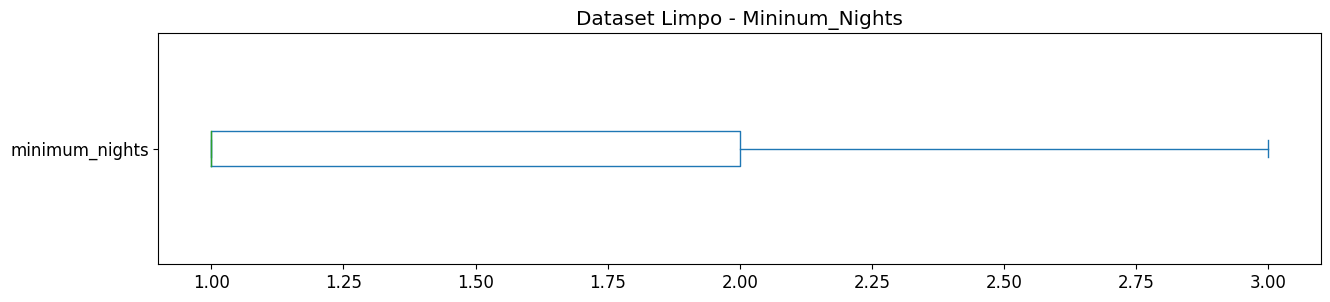

Tamanho original: 11177 colunas
Tamanho atual: 9733 colunas


In [ ]:
# verificar o conjunto limpo
fig, ax = plt.subplots(figsize=(15,3))
df_clean.minimum_nights.plot(kind='box', vert=False);
ax.set_title('Dataset Limpo - Mininum_Nights')
plt.show()

print("Tamanho original: {} colunas".format(df_hk.shape[0]))
print("Tamanho atual: {} colunas".format(df_clean.shape[0]))

Verificaremos agora a diferença em relação aos histogramas.



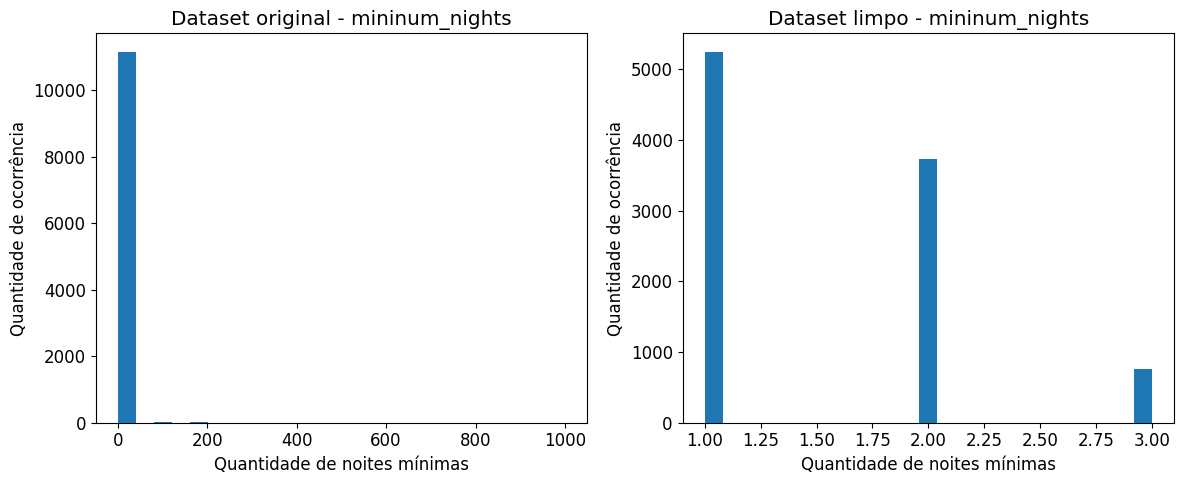

In [ ]:
# histograma anterior para minimum_nights
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
df_hk.minimum_nights.plot(kind = 'hist', ax = ax1, bins = 25)
ax1.set_title("Dataset original - mininum_nights")
ax1.set_xlabel("Quantidade de noites mínimas")
ax1.set_ylabel("Quantidade de ocorrência")

# histograma do dataset limpo para minimum_nights
df_clean.minimum_nights.plot(kind = 'hist', ax = ax2, bins = 25)
ax2.set_title("Dataset limpo - mininum_nights")
ax2.set_xlabel("Quantidade de noites mínimas")
ax2.set_ylabel("Quantidade de ocorrência")

plt.tight_layout()

## **Questão 4** - Qual a média dos preços de aluguel?

In [ ]:
# ver a média da coluna `price`
mean_price = (f'{df_clean.price.mean():.2f}')
brl_price = (f'{df_clean.price.mean() * 0.034:.2f}')
print(f'A média de preços é {mean_price} ienes de Tokyo')
print(f'No momento atual, isso representa {brl_price} reais')

A média de preços é 16171.54 ienes de Tokyo
No momento atual, isso representa 549.83 reais


In [ ]:
# média de preços por distrito
df_clean.groupby(['neighbourhood']).price.mean().sort_values(ascending = False)

neighbourhood
Mitaka Shi             21232.166667
Chiyoda Ku             20578.040816
Shibuya Ku             20518.262172
Minato Ku              19787.834356
Shinjuku Ku            18467.650905
Taito Ku               17159.183959
Chuo Ku                16780.464286
Nishitokyo Shi         16245.833333
Shinagawa Ku           15954.335821
Toshima Ku             15739.485242
Nakano Ku              15545.585455
Edogawa Ku             15179.313187
Ota Ku                 14954.284457
Musashino Shi          14808.111111
Kita Ku                14754.171103
Katsushika Ku          14714.151376
Meguro Ku              14492.886364
Komae Shi              14400.000000
Arakawa Ku             14335.961749
Okutama Machi          14143.000000
Bunkyo Ku              14078.543590
Sumida Ku              14051.641892
Koto Ku                13948.240000
Suginami Ku            13341.459716
Setagaya Ku            12996.693182
Chofu Shi              12711.916667
Koganei Shi            12217.000000
Itabashi Ku   

In [ ]:
# quantidade de imóveis por distrito
df_clean.neighbourhood.value_counts().sort_values(ascending = False)

Shinjuku Ku            1988
Taito Ku               1359
Sumida Ku              1184
Toshima Ku              847
Shibuya Ku              534
Setagaya Ku             352
Ota Ku                  341
Minato Ku               326
Nakano Ku               275
Kita Ku                 263
Chuo Ku                 252
Katsushika Ku           218
Suginami Ku             211
Koto Ku                 200
Bunkyo Ku               195
Arakawa Ku              183
Edogawa Ku              182
Itabashi Ku             166
Chiyoda Ku              147
Shinagawa Ku            134
Adachi Ku                83
Nerima Ku                53
Meguro Ku                44
Fuchu Shi                33
Hachioji Shi             20
Kokubunji Shi            15
Machida Shi              15
Ome Shi                  14
Hino Shi                 13
Chofu Shi                12
Akiruno Shi              11
Musashino Shi             9
Koganei Shi               9
Kunitachi Shi             7
Nishitokyo Shi            6
Mitaka Shi          

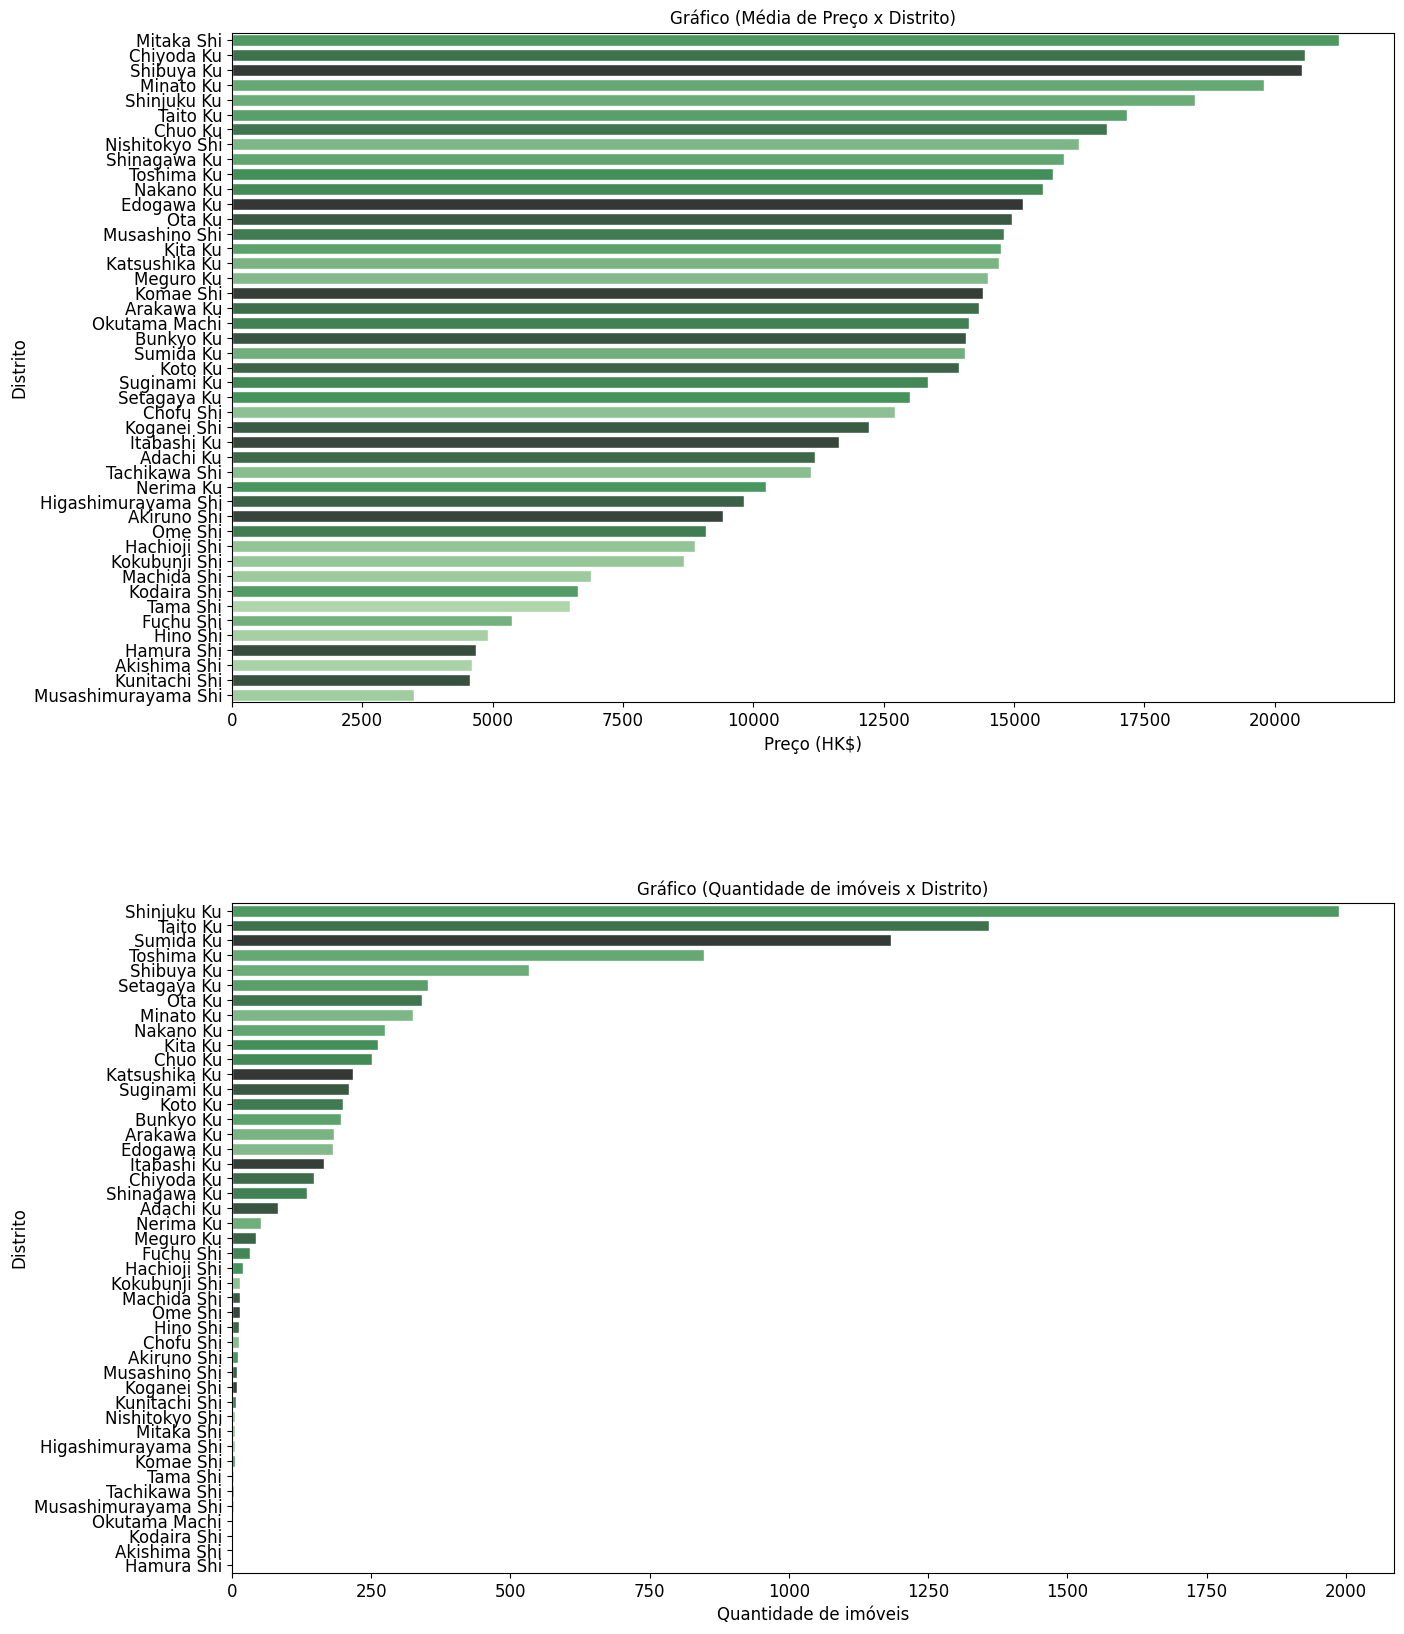

In [ ]:
# plotar gráficos para as informações obtidas

fig, (ax1,ax2)= plt.subplots(2,1,figsize=(15, 20))
fig = plt.subplots_adjust(hspace= 0.3)

# define informações iniciais referentes à coloração
sns.set(style="whitegrid", color_codes=True)
data = df_clean.groupby("neighbourhood").size()
pal = sns.color_palette("Greens_d", len(data))
rank = data.argsort().argsort()


# gráfico da média de preço por distrito
ax1 = sns.barplot(x=list(df_clean.groupby(['neighbourhood']).price.mean().values), y=list(df_clean.groupby(['neighbourhood']).price.mean().index), palette=np.array(pal[::-1])[rank], order= df_clean.groupby(['neighbourhood']).price.mean().sort_values(ascending = False).index, ax = ax1)
ax1.set_xlabel('Preço (HK$)')
ax1.set_ylabel('Distrito')
ax1.set_title("Gráfico (Média de Preço x Distrito)")

#gráfico da quantidade de imóveis por distrito
ax2 = sns.barplot(x= df_clean.neighbourhood.value_counts().values, y= df_clean.neighbourhood.value_counts().index, palette=np.array(pal[::-1])[rank], order = df_clean.neighbourhood.value_counts().sort_values(ascending = False).index , ax = ax2)
ax2.set_xlabel('Quantidade de imóveis')
ax2.set_ylabel('Distrito')
ax2.set_title("Gráfico (Quantidade de imóveis x Distrito)");

## **Questão 5** -  Quais os distritos mais caros?

Não podemos determinar com certeza que os distritos mais caros são aqueles com o valor médio de preço mais elevado. Isso ocorre porque a quantidade de imóveis disponíveis pode influenciar o resultado de maneira significativa. Portanto, vamos examinar a mediana da quantidade de imóveis, que não é suscetível a impactos extremos. Com base nessa informação, buscaremos identificar os distritos mais caros que possuam uma quantidade de dados substancial para embasar nossa análise.

In [ ]:
# verificar mediana da quantidade de imóveis
qtd_imoveis = df_clean.neighbourhood.value_counts().values
mediana = np.median(qtd_imoveis)
print("A mediana da quantidade de imóveis é", mediana)

A mediana da quantidade de imóveis é 44.0


In [ ]:
# verificar os três distritos mais caros com quantidade de imóveis maior ou igual a mediana
df_new = pd.concat([df_clean.neighbourhood.value_counts().rename('Quantidade de imóveis'),
           df_clean.groupby(['neighbourhood']).price.mean().sort_values(ascending = False).rename('Média de preço')], axis = 1).sort_values(by = 'Média de preço', ascending = False)
df_new.loc[df_new['Quantidade de imóveis'] >= 44.0][:3]

,Quantidade de imóveis,Média de preço
Chiyoda Ku,147,20578.040816
Shibuya Ku,534,20518.262172
Minato Ku,326,19787.834356


## Chiyoda
* Chiyoda é um distrito localizado no coração de Tóquio, conhecido por abrigar muitas instituições governamentais, incluindo o Palácio Imperial e a Dieta Nacional do Japão. Além disso, é uma área rica em história e cultura, com diversos santuários, templos e locais históricos. Sua localização central e conexões de transporte eficientes o tornam um local estratégico para negócios e turismo. Devido à sua importância política e cultural, os preços das propriedades em Chiyoda Ku tendem a ser mais elevados, o que pode contribuir para uma média de valores mais alta nesse distrito.

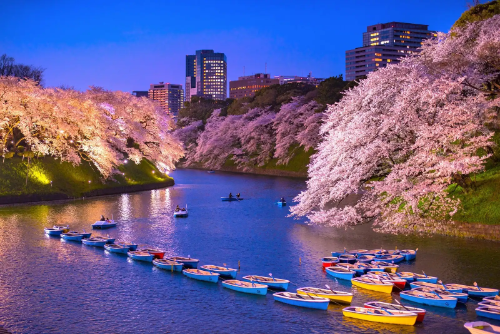

## Shibuya
* Shibuya é uma das áreas mais modernas e movimentadas de Tóquio. É famosa pelo cruzamento de pedestres Shibuya Crossing e pela atmosfera vibrante de suas ruas, repletas de lojas de moda, restaurantes, cafés e vida noturna. Shibuya é frequentemente associada à juventude e à cultura pop, atraindo tanto moradores quanto turistas. Devido à sua popularidade e conveniência, as propriedades nessa área costumam ser valorizadas, o que pode influenciar a média de valores mais alta.

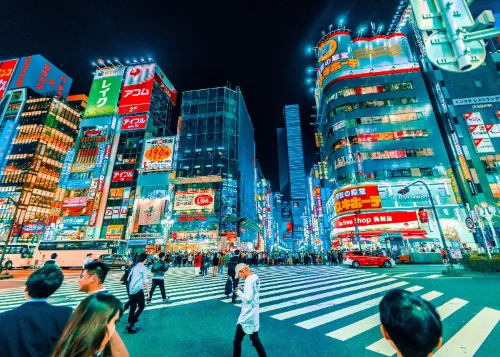

## Minato

* Minato é outro distrito de destaque em Tóquio, conhecido por abrigar muitas embaixadas, empresas multinacionais e a área de negócios de Roppongi. Além disso, é onde está localizada a icônica Torre de Tóquio e o bairro de luxo de Azabu Juban. Minato Ku é frequentemente associado a um estilo de vida sofisticado e é uma das áreas mais internacionalmente orientadas da cidade. A presença de instalações de alto padrão e a conveniência de estar próximo a áreas comerciais e culturais influenciam os preços das propriedades nesse distrito.

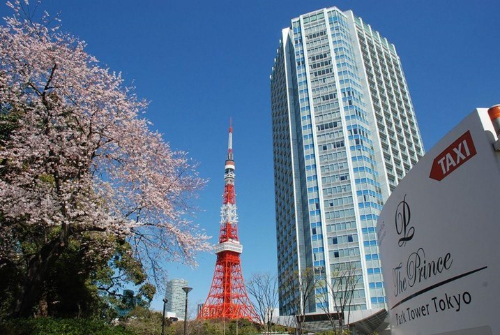

### Conclusão

A relevância desses distritos na análise de média de valores mais alta está relacionada à sua localização privilegiada, conveniência, acesso a serviços de alta qualidade, atrações turísticas e reputação como áreas de prestígio. A presença de instituições importantes, estilo de vida exclusivo e acesso a comodidades premium contribuem para os preços mais elevados das propriedades nesses distritos. Isso pode torná-los atrativos para investidores, expatriados e pessoas que buscam uma experiência de vida excepcional na vibrante metrópole de Tóquio.

# **Questão 6** - quais os preços mínimos e máximos por distrito?

Da mesma forma que examinamos o preço médio, iremos investigar os valores mínimos e máximos para cada distrito analisado em Tokyo.

In [ ]:
# ver preços mínimos por distrito
df_clean.groupby(['neighbourhood']).price.min().sort_values(ascending = False)

neighbourhood
Okutama Machi          14143
Mitaka Shi             11739
Kodaira Shi             6643
Tama Shi                5800
Nerima Ku               5500
Komae Shi               5000
Koganei Shi             5000
Musashino Shi           4900
Hamura Shi              4686
Nishitokyo Shi          4643
Akishima Shi            4600
Chuo Ku                 4257
Shibuya Ku              4180
Akiruno Shi             4043
Higashimurayama Shi     4014
Meguro Ku               3714
Chiyoda Ku              3600
Chofu Shi               3586
Bunkyo Ku               3571
Musashimurayama Shi     3500
Kunitachi Shi           3500
Tachikawa Shi           3500
Kokubunji Shi           3500
Kita Ku                 3500
Setagaya Ku             3300
Hachioji Shi            3300
Minato Ku               3243
Machida Shi             3143
Shinjuku Ku             3100
Shinagawa Ku            3000
Suginami Ku             3000
Adachi Ku               3000
Fuchu Shi               2850
Nakano Ku               2780


In [ ]:
# preços máximos por distrito
df_clean.groupby(['neighbourhood']).price.max().sort_values(ascending = False)

neighbourhood
Taito Ku               46279
Koto Ku                46183
Shinjuku Ku            46180
Minato Ku              46000
Kita Ku                45857
Nakano Ku              45800
Bunkyo Ku              45571
Toshima Ku             45551
Chiyoda Ku             45414
Sumida Ku              45143
Chuo Ku                45086
Arakawa Ku             45000
Edogawa Ku             45000
Suginami Ku            45000
Shibuya Ku             45000
Meguro Ku              45000
Adachi Ku              44551
Setagaya Ku            43857
Ota Ku                 43571
Katsushika Ku          42829
Nishitokyo Shi         40081
Itabashi Ku            39629
Shinagawa Ku           38000
Nerima Ku              36540
Akiruno Shi            35857
Komae Shi              34000
Tachikawa Shi          33143
Chofu Shi              32000
Musashino Shi          31143
Fuchu Shi              29074
Higashimurayama Shi    28833
Mitaka Shi             28750
Kokubunji Shi          28571
Ome Shi                25000


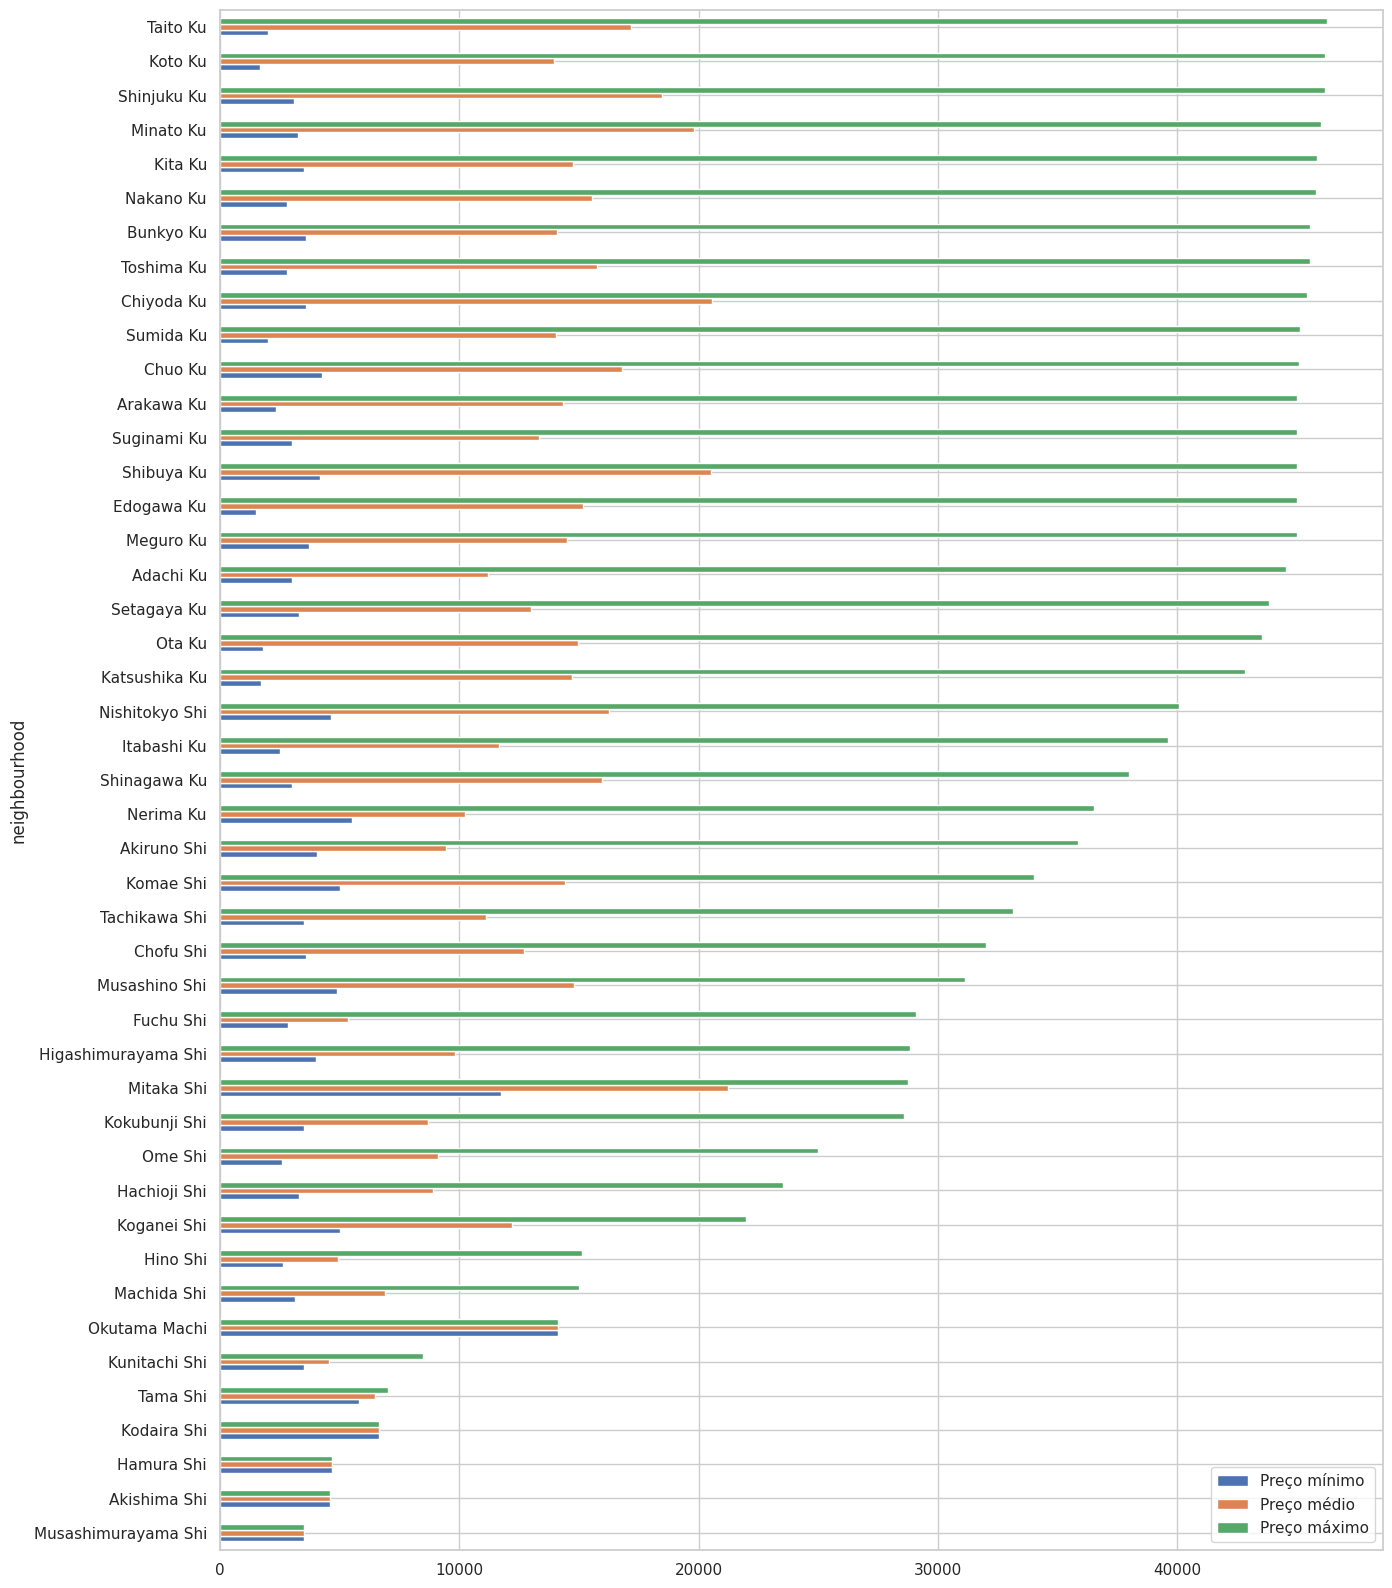

In [ ]:
# comparar preço mínimo, médio e máximo por distrito
pd.concat([df_clean.groupby(['neighbourhood']).price.min().rename('Preço mínimo'),
           df_clean.groupby(['neighbourhood']).price.mean().rename('Preço médio'),
           df_clean.groupby(['neighbourhood']).price.max().rename('Preço máximo')],
          axis=1).sort_values('Preço máximo').plot.barh(figsize = (15, 20));

In [ ]:
min_price = (f'{df_clean.price.min():.2f}')
max_price = (f'{df_clean.price.max():.2f}')
brl_price = [f'{df_clean.price.min() * 0.034:.2f}', f'{df_clean.price.max() * 0.034:.2f}']

print(f'O menor preço observado é {min_price} ienes')
print(f'No momento atual, isso representa {brl_price[0]} reais\n')
print(f'O maior preço observado é {max_price} ienes')
print(f'No momento atual, isso representa {brl_price[1]} reais')

O menor preço observado é 1500.00 ienes
No momento atual, isso representa 51.00 reais

O maior preço observado é 46279.00 ienes
No momento atual, isso representa 1573.49 reais


# **Questão 7** - qual a média da quantidade mínimas de noites para alugar?

In [ ]:
# ver a média da coluna `minimum_nights`
mean_minimum_nights = (f'{df_clean.minimum_nights.mean():.2f}')

print(f'O mínimo de noites é {df_clean.minimum_nights.min()}.')
print(f'A média de noites são {mean_minimum_nights}.')
print(f'O máximo de noites são {df_clean.minimum_nights.max()}.')

O mínimo de noites é 1.
A média de noites são 1.54.
O máximo de noites são 3.


In [ ]:
# ver a média de noites mínimas por distrito
df_clean.groupby(['neighbourhood']).minimum_nights.mean().sort_values(ascending = False)

neighbourhood
Akishima Shi           3.000000
Higashimurayama Shi    2.200000
Komae Shi              2.000000
Meguro Ku              1.977273
Suginami Ku            1.838863
Mitaka Shi             1.833333
Ota Ku                 1.785924
Musashino Shi          1.777778
Setagaya Ku            1.738636
Hino Shi               1.692308
Shibuya Ku             1.681648
Itabashi Ku            1.656627
Nakano Ku              1.647273
Sumida Ku              1.641892
Kita Ku                1.619772
Nerima Ku              1.603774
Toshima Ku             1.596222
Chofu Shi              1.583333
Adachi Ku              1.542169
Minato Ku              1.539877
Koto Ku                1.510000
Edogawa Ku             1.478022
Bunkyo Ku              1.471795
Shinjuku Ku            1.471328
Katsushika Ku          1.467890
Kokubunji Shi          1.466667
Machida Shi            1.466667
Shinagawa Ku           1.447761
Taito Ku               1.428992
Nishitokyo Shi         1.333333
Chuo Ku                1.2

# **Questão 8**. Qual a correlação existente entre as variáveis?

O coeficiente de correlação mede a relação estatística entre duas variáveis, sendo que a medida que o valor de uma variável aumenta, maior a sua associação. Iremos agora plotar uma matriz de correlação para os valores números do nosso dataset, onde seguiremos os seguintes passos:

* Criar uma matriz de correlação
* Exibir seu resultado
* Plotar um gráfico de correlação

In [ ]:
# criar uma matriz de correlação
corr_df = df_clean[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'availability_365']].corr(method='pearson');

# mostrar a matriz de correlação
display(corr_df);

,price,minimum_nights,number_of_reviews,reviews_per_month,availability_365
price,1.000000,-0.012720,0.072410,0.073619,0.024830
minimum_nights,-0.012720,1.000000,-0.012920,-0.048873,0.045439
number_of_reviews,0.072410,-0.012920,1.000000,0.504327,-0.064266
reviews_per_month,0.073619,-0.048873,0.504327,1.000000,0.029078
availability_365,0.024830,0.045439,-0.064266,0.029078,1.000000


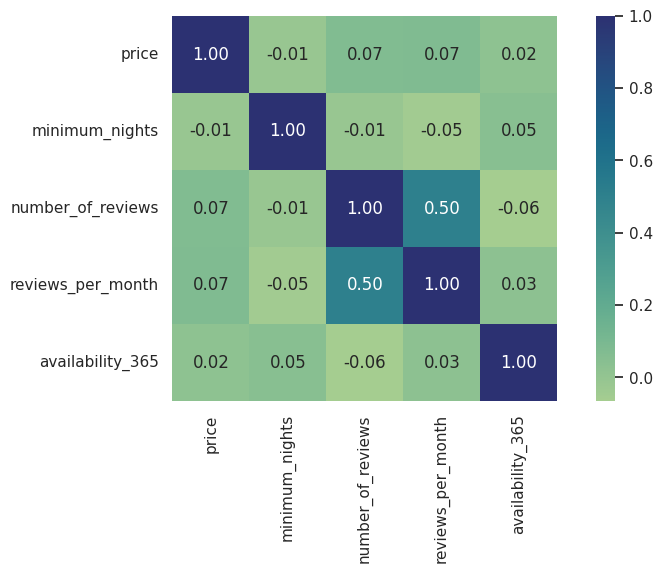

In [ ]:
# plotar o gráfico de correlação
sns.heatmap(corr_df,cmap = 'crest', fmt='.2f',square = True, linecolor = 'white', annot = True);

# **Questão 9**. Qual o tipo de imóvel mais alugado no Airbnb?

In [ ]:
# mostrar a quantidade de cada tipo de imóvel disponível
df_clean.room_type.value_counts().sort_values(ascending = False)

Entire home/apt    6987
Private room       2352
Shared room         224
Hotel room          170
Name: room_type, dtype: int64

In [ ]:
# mostrar a porcentagem de cada tipo de imóvel disponível
df_clean.room_type.value_counts()/df_clean.shape[0] * 100

Entire home/apt    71.786705
Private room       24.165211
Shared room         2.301449
Hotel room          1.746635
Name: room_type, dtype: float64

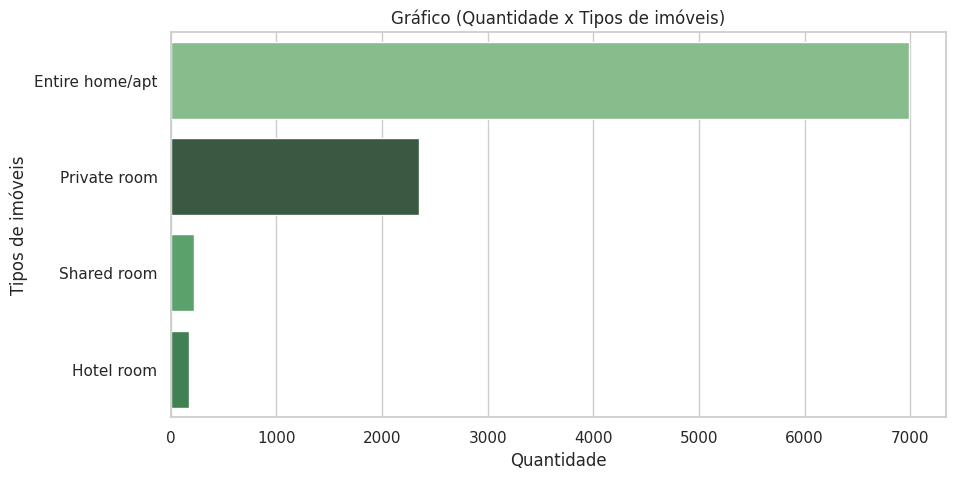

In [ ]:
# Plotando gráficos para tipos de imóveis
fig, ax = plt.subplots()

# definir informações iniciais referentes à coloração
sns.set(style="whitegrid", color_codes=True)
data = df_clean.groupby("room_type").size()
pal = sns.color_palette("Greens_d", len(data))
rank = data.argsort().argsort()

# gráfico da quantidade de imóveis por seu tipo
ax2 = sns.barplot(x= df_clean.room_type.value_counts().values, y= df_clean.room_type.value_counts().index, palette=np.array(pal[::-1])[rank], ax = ax)
ax2.set_xlabel('Quantidade')
ax2.set_ylabel('Tipos de imóveis')
ax2.set_title("Gráfico (Quantidade x Tipos de imóveis)");

# Conclusões

Com base na análise detalhada que foi apresentada, concluímos que existem aspectos importantes a serem considerados na qualidade dos dados, incluindo a presença de valores ausentes e outliers. Isso nos leva a reconhecer que mesmo um conjunto de dados relativamente compacto exige uma avaliação criteriosa para validar ou rejeitar as sugestões geradas pelo sistema, e também para fazer ajustes que garantam a obtenção de um conjunto de dados mais autêntico e confiável.

Além disso, uma tendência intrigante foi identificada entre os habitantes de Tóquio e suas escolhas no Airbnb.

* Mais de **50%** dos usuários que foram analisados oferecem **quartos privados** para locação, enquanto apenas **1%** oferece opções de **hospedagem em hotéis**.
* Observou-se que o número mínimo de noites alugadas foi de apenas uma noite, com uma média aproximada de 3,5 dias por reserva.

Destaca-se também que os preços variam amplamente:

* **preço mínimo**: ¥1.500 (equivalente a R$ 51,12) em Edogawa, um distrito que possui uma densidade populacional considerável devido à sua proximidade com o centro de Tóquio.

* **preço máximo** ¥46.279 (cerca de R$ 1.577,29) no distrito de Taito, que tende a ser menos densamente povoado em comparação com algumas outras partes da cidade.

Por último, é importante ressaltar que a base de dados utilizada nesta análise é uma versão resumida, desenvolvida para atender ao escopo proposto neste projeto como uma abordagem inicial. Para investigações mais aprofundadas, é altamente recomendado utilizar a versão completa do conjunto de dados, incluindo todos os atributos disponíveis. Isso permitirá uma análise mais completa e insights ainda mais precisos sobre as dinâmicas do mercado de aluguel por temporada em Tóquio.